<a href="https://colab.research.google.com/github/PravallikaaMohan/InfoPillarSolutions-Machine-Learning/blob/main/Insurance_Purchase_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**INFOPILLAR SOLUTION - MACHINE LEARNING VIRTUAL INTERNSHIP PROGRAM**

## **TASK 1 - INSURANCE PURCHASE PREDICTION USING MACHINE LEARNING**

**Author:** Pravallikaa M

**Dataset:** https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset?select=insurance3r2.csv




### **Loading the Libraries**

In [ ]:
from re import I
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### **Loading the Dataset**

In [ ]:
from google.colab import files
file = files.upload()
data = pd.read_csv('insurance3r2.csv')

Saving insurance3r2.csv to insurance3r2 (1).csv


### **Analyse the data**

In [ ]:
data.shape # To find out the number of rows and columns in the datset

(1338, 9)

So, there are 1338 rows and 9 columns in the dataset.

In [ ]:
data.columns # To know about the various columns present in the dataset

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

The 9 columns are : age, sex, bmi, steps, children, smoker, region, charges and insuranceclaim.

In [ ]:
data.head(10) # To view the first 10 rows of the dataset

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
5,31,0,25.740,8005,0,0,2,3756.62160,0
6,46,0,33.440,3002,1,0,2,8240.58960,1
7,37,0,27.740,8007,3,0,1,7281.50560,0
8,37,1,29.830,8002,2,0,0,6406.41070,0
9,60,0,25.840,5008,0,0,1,28923.13692,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


There are 7 columns which have integer type data and two columns which have float type data.

In [ ]:
data.groupby('region').size() # To find the number of people in each region

region
0    324
1    325
2    364
3    325
dtype: int64

In [ ]:
data.groupby('children').size()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

In [ ]:
data.groupby('smoker').size() # 0 - non smoker; 1 - smoker

smoker
0    1064
1     274
dtype: int64

### **Data Cleaning**

In [ ]:
data.isnull().sum() # To find the number of missing data in each column

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

There are no missing data in any column.

In [ ]:
data.describe() # to view some basic statistical details like percentile, mean, std etc. of a data frame of numeric values

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


We find that 58% of the people purchase the insurance.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


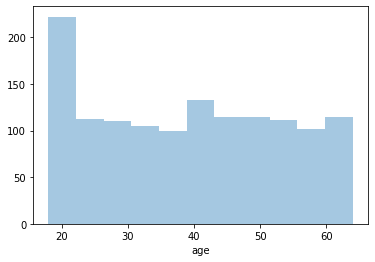

In [ ]:
sns.distplot(data.age,kde=False)

The plot is spreaded and is not skewed. So, there are no outliers in this criteria.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


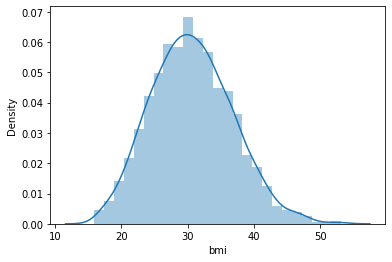

In [ ]:
sns.distplot(data.bmi,kde=True)

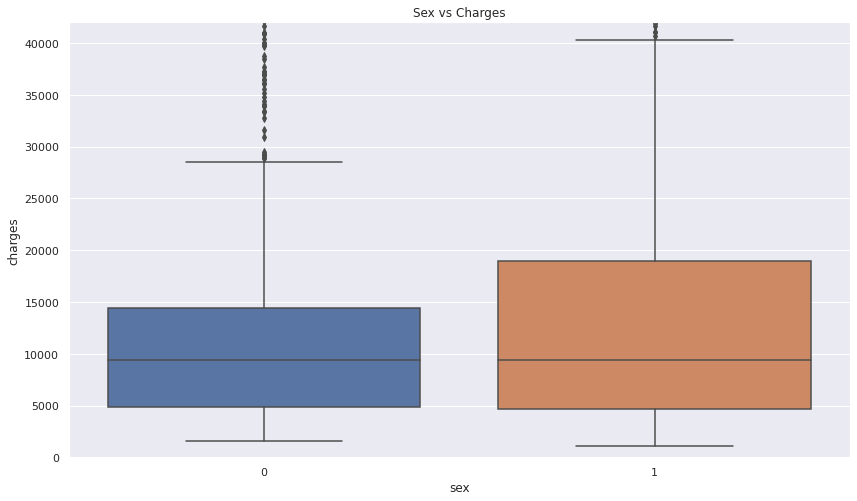

In [ ]:
df = data[['sex', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs Charges')
plt.ylim((0, 42000))
plt.show()

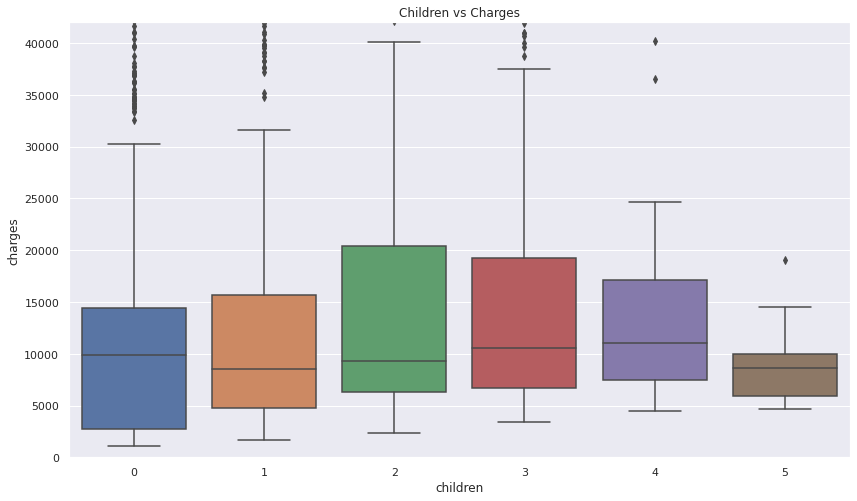

In [ ]:
df = data[['children', 'charges']]
plt.figure(figsize = (14,8))
sns.boxplot(x='children', y='charges', data=df)
plt.title('Children vs Charges')
plt.ylim((0, 42000))
plt.show()

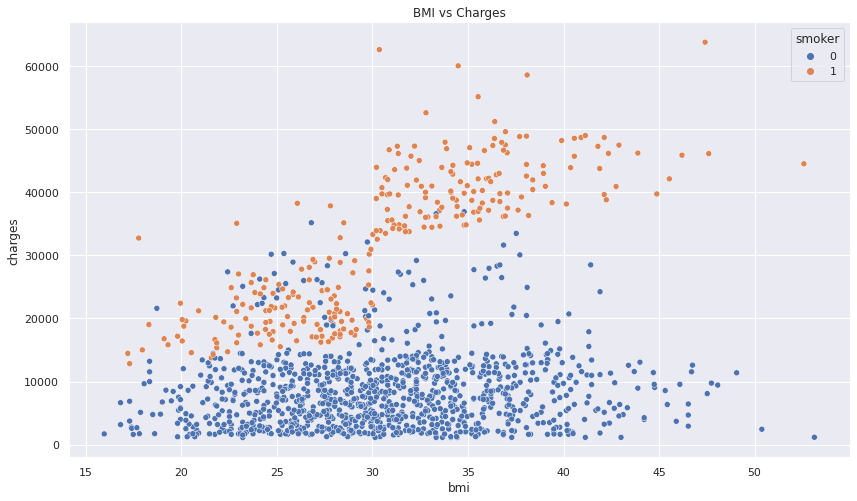

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(x='bmi', y='charges', data=data,hue='smoker')
plt.title('BMI vs Charges')
plt.show()

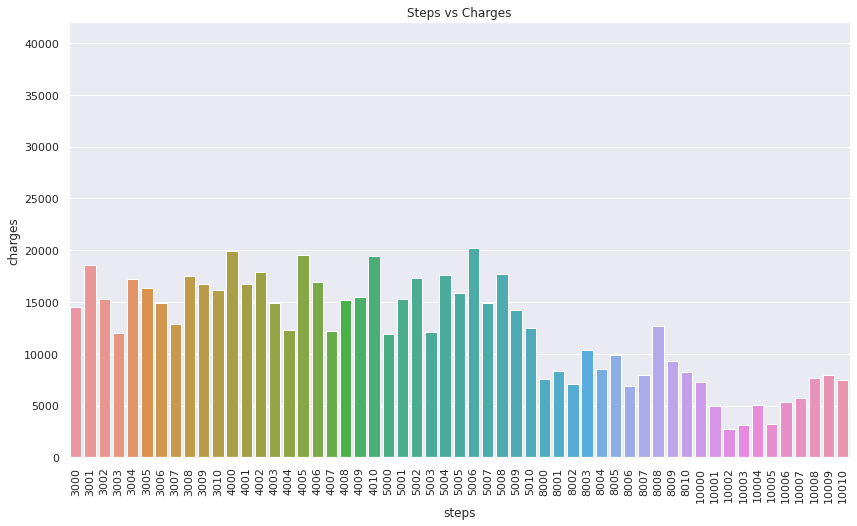

In [ ]:
df = data[['steps', 'charges']]
plt.figure(figsize = (14,8))
sns.barplot(x='steps', y='charges', data=df,ci=None)
plt.title('Steps vs Charges')
plt.ylim((0, 42000))
plt.xticks(rotation=90)
plt.show()

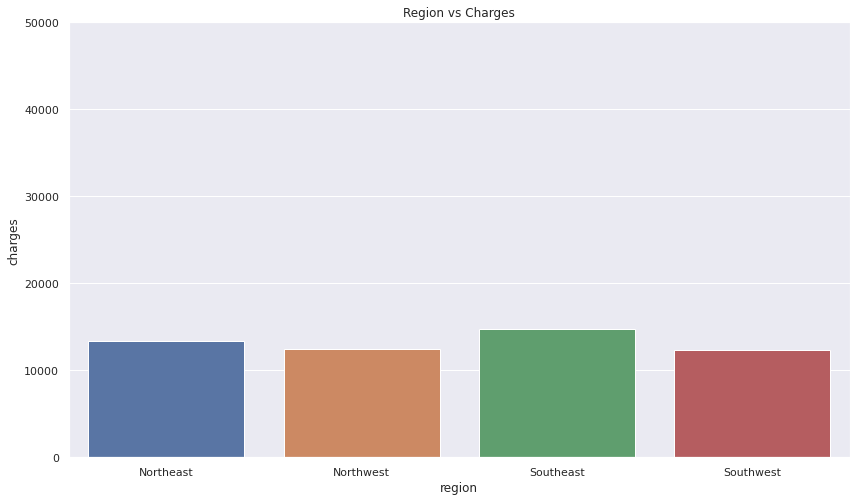

In [ ]:
xticks = [0, 1, 2, 3]
xlabels = ['Northeast', 'Northwest', 'Southeast', 'Southwest']
df = data[['region', 'charges']]
plt.figure(figsize = (14,8))
sns.barplot(x='region', y='charges', data=df,ci=None)
plt.title('Region vs Charges')
plt.ylim((0, 50000))
plt.xticks(xticks, xlabels)
plt.show()

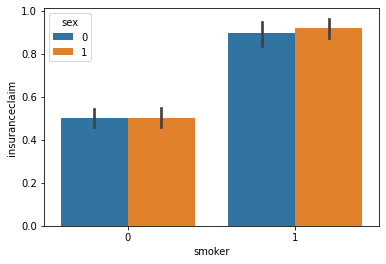

In [ ]:
sns.barplot(x="smoker",
           y="insuranceclaim",
           hue="sex",
           data=data)

Smokers (males) are more likely to purchase the insurance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


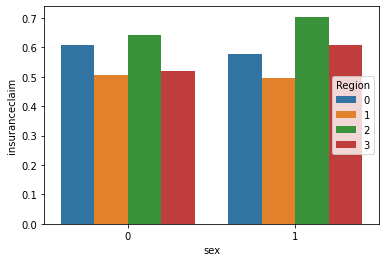

In [ ]:
sns.barplot(data.sex,data.insuranceclaim,hue="region",data=data,ci=None)
plt.legend(loc='right',title='Region')

We can see that males from region 2 are most likely to purchase an insurance followed by females from region 2

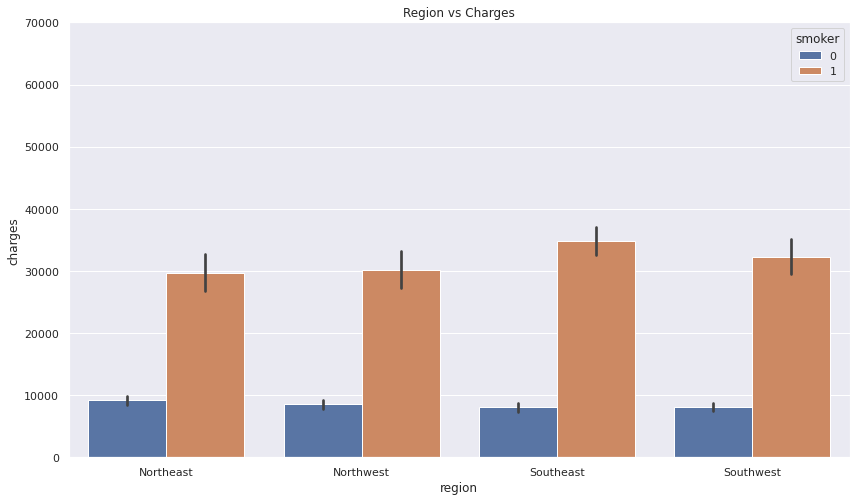

In [ ]:
df = data[['region', 'charges']]
plt.figure(figsize = (14,8))
sns.barplot(x='region', y='charges', data=df, hue=data.smoker)
plt.title('Region vs Charges')
plt.ylim((0, 70000))
plt.xticks(xticks, xlabels)
plt.show()

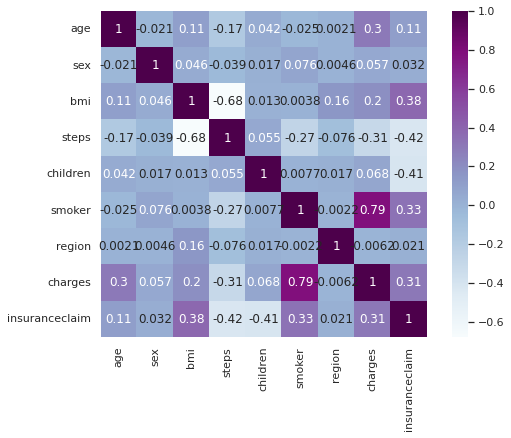

In [ ]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,square=True,cmap="BuPu", annot = True)

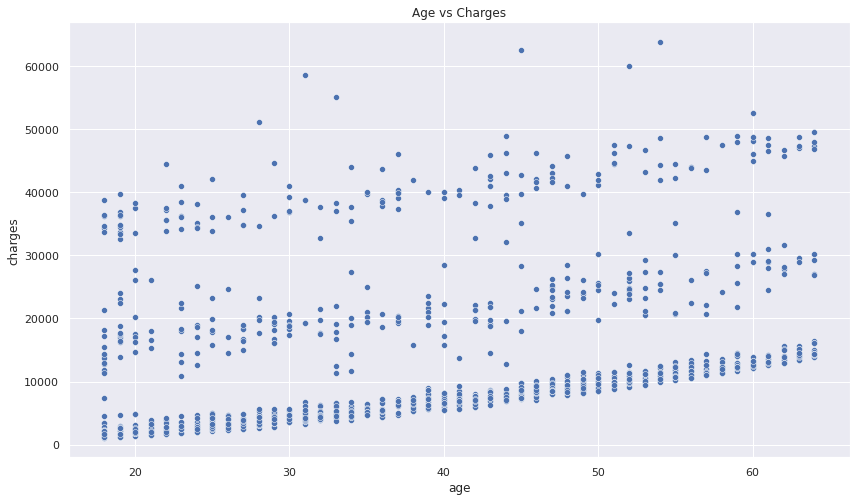

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=data)
plt.title('Age vs Charges')
plt.show()

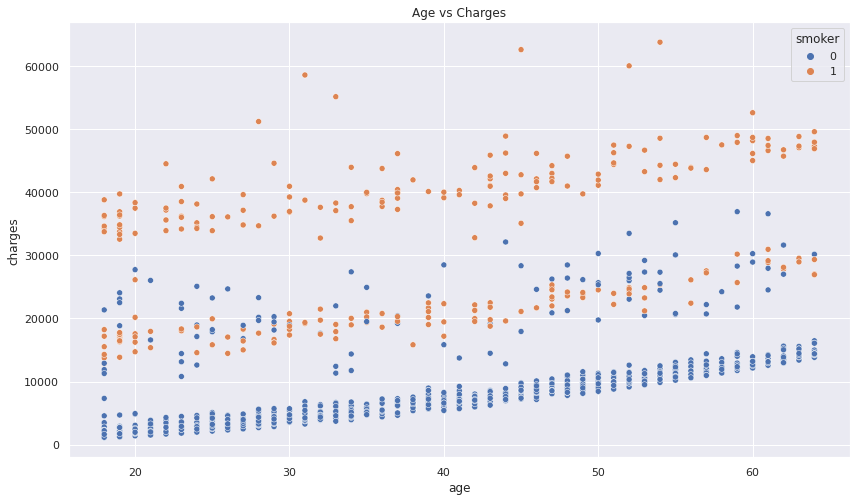

In [ ]:
plt.figure(figsize = (14,8))
sns.scatterplot(x='age', y='charges', data=data,hue='smoker')
plt.title('Age vs Charges')
plt.show()

### **Splitting the dataset**

We split the dataset in 80:20 ratio. 80% for training and 20% for testing.

In [ ]:
array = data.values
X = array[:,:-1]
Y = array[:,-1]
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size=0.2,random_state=7)

### **Evaluating and Training the model**

We are going to apply the following algorithms and finally choose the best algorithm to train it.

          1)K – Nearest Neighbour (KNN)

          2)Support Vector Machine (SVM)

          3)Randomforest

          4)Logistic Regression

In [ ]:
model = KNeighborsClassifier()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.6753731343283582

In [ ]:
model = SVC()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.7276119402985075

In [ ]:
model = RandomForestClassifier(n_estimators=3)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.9402985074626866

In [ ]:
model = LogisticRegression()
model.fit(X_train,Y_train)
predictions = model.predict(X_test)
accuracy_score(Y_test, predictions)

0.8432835820895522

We see that Random Forest Classifier gives us a higher accuracy score.

Accuracy: 0.9402985074626866